# MP0 : Image Demosaicing

Welcome to CS 543! This assignment is a warm-up assignment to get you back up working from the winter break! We will try to provide you an iPython Notebook (like this) for all the future assignments! The notebook will provide you some further instructions(implementation related mainly), in addition to the ones provided on class webpage.

### Import statements

The following cell is only for import statements. You can use any of the 3 : cv2, matplotlib or skimage for image i/o and other functions. We will provide you the names of the relevant functions for each module. __{For convenience provided at the end of the class assignment webpage}__

In [88]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage
import scipy
import scipy.ndimage
from scipy.signal import medfilt2d
%matplotlib inline

### Reading the Mosaic Image

In [89]:
def read_image(IMG_NAME):
    bgr_img = cv2.imread('images/' + IMG_NAME, 1)
    b, g, r = cv2.split(bgr_img) # get b,g,r
    rgb_img = cv2.merge([r,g,b]) # switch to rgb
    return rgb_img

In [90]:
IMG_DIR = 'images/'
IMG_NAME = 'crayons.bmp'
mosaic_img = read_image(IMG_NAME)
# print(mosaic_img.shape)

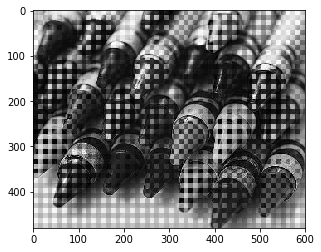

In [91]:
# For a sanity check, display your image here
def display(img):
    imgplot = plt.imshow(img)
    # plt.xticks([]), plt.yticks([]) 
    plt.show()
    return

display(mosaic_img)

### Linear Interpolation

In [92]:
### HINT : You might want to use filters

In [93]:
### HINT : To use filters you might want to write your kernels

In [94]:
### HINT : For writing your kernels you might want to see the RGB Pattern provided on the website

In [95]:
### HINT : To improve your kernels, you might want to use the squared difference 
###        between your solution image and the original image

In [96]:
def kernel_function_selection():
    kernel_green = np.array([[0, 0.25 ,0],
                             [0.25,1.0, 0.25],
                             [0,0.25,0]])
    kernel_red_blue = np.array([[0.25, 0.5, 0.25],
                                [0.5, 1, 0.5],
                                [0.25, 0.5, 0.25]])
    return kernel_green, kernel_red_blue
    
def get_solution_image(mosaic_img):
    '''
    This function should return the soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    '''
    mosaic_shape = np.shape(mosaic_img)
    soln_image = np.zeros((mosaic_shape[0], mosaic_shape[1], 3), dtype= 'uint8')
    
    # Initilize r,b,g
    r = np.zeros((mosaic_shape[0],mosaic_shape[1]))
    b = np.zeros((mosaic_shape[0],mosaic_shape[1]))
    g = np.zeros((mosaic_shape[0],mosaic_shape[1]))
    
    # Split and assign value into these three channels
    r[0::2, 0::2] = mosaic_img[:,:,0][0::2, 0::2]
    g[1::2, 0::2] = mosaic_img[:,:,1][1::2, 0::2]
    g[0::2, 1::2] = mosaic_img[:,:,1][0::2, 1::2]
    b[1::2, 1::2] = mosaic_img[:,:,2][1::2, 1::2]
    
    kernel_green, kernel_red_blue = kernel_function_selection()
    
    # convolve
    soln_image[:,:, 0] = scipy.ndimage.filters.convolve(r, kernel_red_blue, mode = 'mirror')
    soln_image[:,:, 1] = scipy.ndimage.filters.convolve(g, kernel_green, mode = 'mirror')
    soln_image[:,:, 2] = scipy.ndimage.filters.convolve(b, kernel_red_blue, mode = 'mirror')
   
    return soln_image

In [97]:
def compute_errors(soln_image, original_image, save_error_map = False):
    '''
    Compute the Average and Maximum per-pixel error
    for the image.
    
    Also generate the map of pixel differences
    to visualize where the mistakes are made
    '''
    # error
    error = (soln_image - original_image)**2
    ssd = np.sum(error, axis = 2)
    max_err = np.max(ssd)
    pp_err = np.mean(ssd)
    map_display(ssd)
    if save_error_map == False:
        return pp_err, max_err
    if save_error_map == True:
        return pp_err, max_err, ssd

def map_display(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#     plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()
    return

We provide you with 3 images to test if your solution works. Once it works, you should generate the solution for test image provided to you.

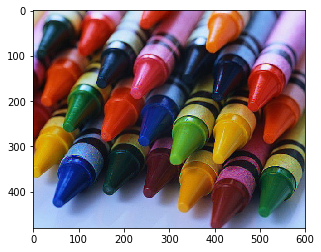

True

In [98]:
mosaic_img = read_image('crayons.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('crayons.jpg')
# For sanity check display your solution image here
# map_display(soln_image)
# display(original_image)
display(soln_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('crayons_training_linear.png', image_to_write)

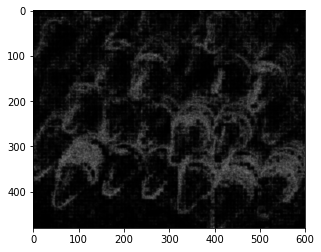

The average per-pixel error for crayons is: 47.86914236111111
The maximum per-pixel error for crayons is: 678


In [99]:
pp_err, max_err = compute_errors(soln_image, original_image)

print("The average per-pixel error for crayons is: "+str(pp_err))
print("The maximum per-pixel error for crayons is: "+str(max_err))

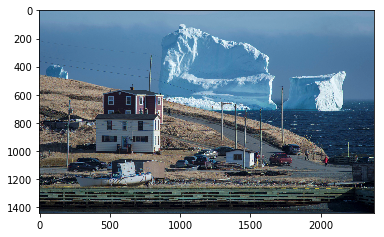

True

In [100]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('iceberg.jpg')
# For sanity check display your solution image here
# map_display(soln_image)
display(soln_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('iceberg_training_linear.png', image_to_write)

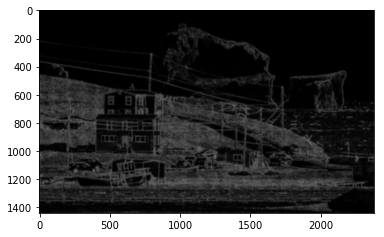

The average per-pixel error for iceberg is: 43.93339164101129
The maximum per-pixel error for iceberg is: 498


In [101]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for iceberg is: "+str(pp_err))
print("The maximum per-pixel error for iceberg is: "+str(max_err))

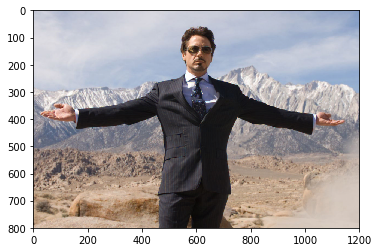

True

In [102]:
mosaic_img = read_image('tony.bmp')
soln_image = get_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
# map_display(soln_image)
display(soln_image)
# display(original_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('tony_training_linear.png', image_to_write)

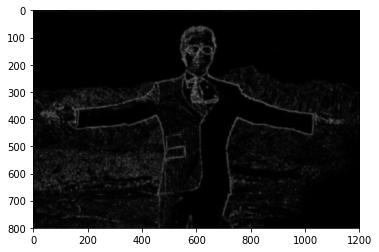

The average per-pixel error for tony is: 14.996192708333334
The maximum per-pixel error for tony is: 482


In [103]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

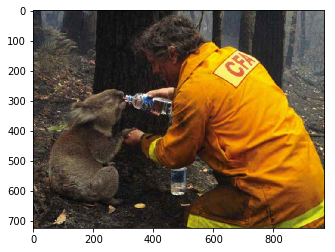

True

In [104]:
mosaic_img = read_image('hope.bmp')
soln_image = get_solution_image(mosaic_img)
# Generate your solution image here and show it 
# map_display(soln_image)
display(soln_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('hope_linear.png', image_to_write)

### Freeman's Method

For details of the freeman's method refer to the class assignment webpage.

__MAKE SURE YOU FINISH LINEAR INTERPOLATION BEFORE STARTING THIS PART!!!__

In [105]:
def get_freeman_solution_image(mosaic_img):
    '''
    This function should return the freeman soln image.
    Feel free to write helper functions in the above cells
    as well as change the parameters of this function.
    
    HINT : Use the above get_solution_image function.
    '''
    temp_image = get_solution_image(mosaic_img)
    r = temp_image[:,:,0]
    g = temp_image[:,:,1]
    b = temp_image[:,:,2]
    
    # Compute the differences
    r_g = r-g
    b_g = b-g
    
    # Median filtering
    new_r = medfilt2d(r_g)+g
    new_b = medfilt2d(b_g)+g
    
    # Stack new r,g,b together
    
    freeman_soln_image = temp_image
    freeman_soln_image[:,:,0] = new_r
    freeman_soln_image[:,:,2] = new_b
#     freeman_soln_image = np.float64(freeman_soln_image / 255)
#     freeman_soln_image = cv2.normalize(freeman_soln_image.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    return freeman_soln_image

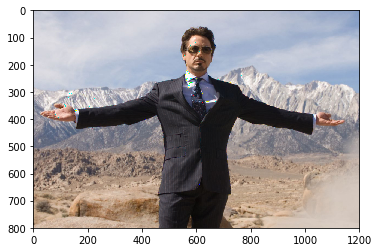

True

In [106]:
mosaic_img = read_image('tony.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('tony.jpg')
# For sanity check display your solution image here
# map_display(soln_image)
display(soln_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('tnoy_training_freeman.png', image_to_write)

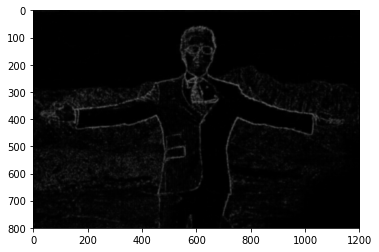

The average per-pixel error for tony is: 14.552795833333333
The maximum per-pixel error for tony is: 681


In [107]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

In [108]:
### Feel free to play around with other images for Freeman's method above ###

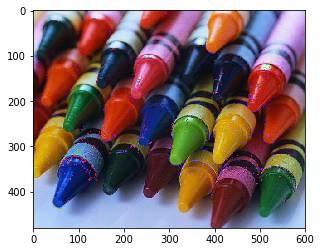

True

In [109]:
mosaic_img = read_image('crayons.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('crayons.jpg')
# For sanity check display your solution image here
# map_display(soln_image)
display(soln_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('crayons_training_freeman.png', image_to_write)

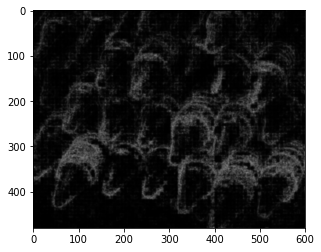

The average per-pixel error for tony is: 49.50285763888889
The maximum per-pixel error for tony is: 715


In [110]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

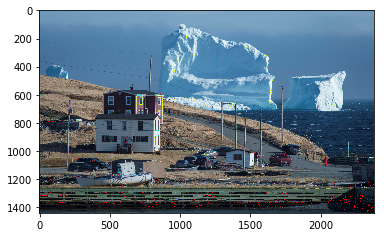

True

In [111]:
mosaic_img = read_image('iceberg.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
original_image = read_image('iceberg.jpg')
# For sanity check display your solution image here
# map_display(soln_image)
display(soln_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('iceberg_training_freeman.png', image_to_write)

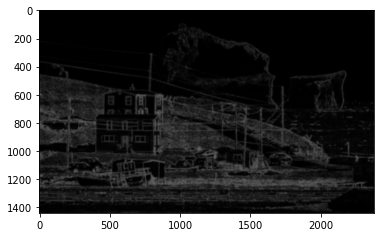

The average per-pixel error for tony is: 45.97697779643624
The maximum per-pixel error for tony is: 718


In [112]:
pp_err, max_err = compute_errors(soln_image, original_image)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

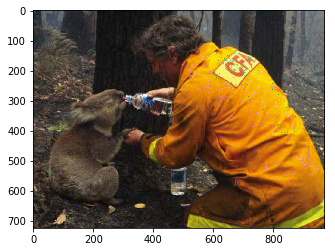

True

In [113]:
mosaic_img = read_image('hope.bmp')
soln_image = get_freeman_solution_image(mosaic_img)
# Generate your solution image here and show it
display(soln_image)
image_to_write = cv2.cvtColor(soln_image, cv2.COLOR_RGB2BGR)
cv2.imwrite('Hope_freeman.png', image_to_write)

### Mosaicing an Image

Now lets take a step backwards and mosaic an image.

In [114]:
def get_mosaic_image(original_image):
    '''
    Generate the mosaic image using the Bayer Pattern.
    '''
#     height, width = original_image.shape[0], original_image.shape[1]
# #     print(height, width)
#     mosaic_img = np.zeros((height, width, 3), dtype= 'uint8')
# #     mosaic_img[:,:,0][0::2, 0::2] = original_image[:,:,0][0::2, 0::2] # Red
# #     mosaic_img[:,:,1][1::2, 0::2] = original_image[:,:,1][1::2, 0::2] # Green
# #     mosaic_img[:,:,1][0::2, 1::2] = original_image[:,:,1][0::2, 1::2] # Green
# #     mosaic_img[:,:,2][1::2, 1::2] = original_image[:,:,2][1::2, 1::2] # Blue
#     height, width = original_image.shape[0], original_image.shape[1]
#     print(height, width)
    mosaic_img = np.zeros((original_image.shape[0], original_image.shape[1],3), dtype= 'uint8')
    mosaic_img[:,:,0][::2, ::2] = original_image[:,:,0][::2, ::2] # Red
    mosaic_img[:,:,1][1::2, 0::2] = original_image[:,:,1][1::2, ::2] # Green
    mosaic_img[:,:,1][::2, 1::2] = original_image[:,:,1][::2, 1::2] # Green
    mosaic_img[:,:,2][1::2, 1::2] = original_image[:,:,2][1::2, 1::2] # Blue
#     b, g, r = cv2.split(original_image) # get b,g,r

#     mosaic_img = cv2.merge([r,g,b]) # switch to rgb
    return mosaic_img

In [115]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# def grey_display(image):
#     img = mpimg.imread('image.png')     
#     gray = rgb2gray(img)    
#     plt.imshow(gray, cmap = plt.get_cmap('gray'))
#     plt.show()

In [116]:
### YOU CAN USE ANY OF THE PROVIDED IMAGES TO CHECK YOUR get_mosaic_function

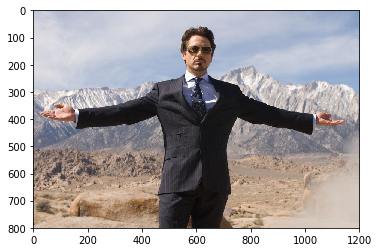

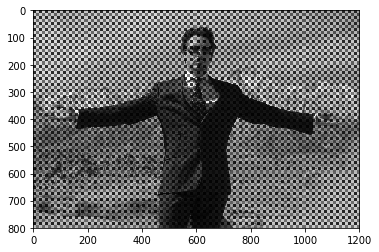

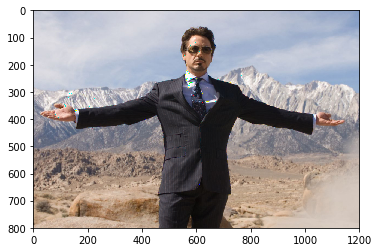

In [117]:
orig_image = read_image('tony.jpg')
display(orig_image)
mosaic_image = get_mosaic_image(orig_image)
# display(mosaic_image)
# img = mpimg.imread('image.png')     
gray = rgb2gray(mosaic_image)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

soln_image = get_freeman_solution_image(mosaic_image)
display(soln_image)

Use any 3 images you find interesting and generate their mosaics as well as their demosaics. Try to find images that break your demosaicing function.

In [118]:
# ### YOUR CODE HERE ###
# # 1
# origi_img1 = read_image('img1.jpg')
# mosaic_img1 = get_mosaic_image(origi_img1)
# # display(mosaic_img1)
# gray = rgb2gray(mosaic_img1)    
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
# plt.show()
# soln_img1 = get_freeman_solution_image(mosaic_img1)
# display(soln_img1)
# pp_err, max_err, ssd = compute_errors(soln_img1, origi_img1, True)
# print("The average per-pixel error for tony is: "+str(pp_err))
# print("The maximum per-pixel error for tony is: "+str(max_err))

# image_to_write = cv2.cvtColor(soln_img1, cv2.COLOR_RGB2BGR)
# cv2.imwrite('soln_img1.png', image_to_write)

# # image_to_write = cv2.cvtColor(ssd, cv2.COLOR_RGB2BGR)
# # cv2.imwrite('soln_img1_error.png', ssd)



In [119]:
# # 2
# origi_img2 = read_image('img2.jpg')
# mosaic_img2 = get_mosaic_image(origi_img2)
# # display(mosaic_img2)
# gray = rgb2gray(mosaic_img2)    
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
# plt.show()
# soln_img2 = get_freeman_solution_image(mosaic_img2)
# display(soln_img2)

# pp_err, max_err, ssd = compute_errors(soln_img2, origi_img2, True)
# print("The average per-pixel error for tony is: "+str(pp_err))
# print("The maximum per-pixel error for tony is: "+str(max_err))


In [120]:
# # 3
# origi_img3 = read_image('img3.jpg')
# mosaic_img3 = get_mosaic_image(origi_img3)
# # display(mosaic_img3)
# gray = rgb2gray(mosaic_img3)    
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
# plt.show()
# soln_img3 = get_freeman_solution_image(mosaic_img3)
# display(soln_img3)


# pp_err, max_err, ssd = compute_errors(soln_img3, origi_img3, True)
# print("The average per-pixel error for tony is: "+str(pp_err))
# print("The maximum per-pixel error for tony is: "+str(max_err))

# image_to_write = cv2.cvtColor(soln_img3, cv2.COLOR_RGB2BGR)
# cv2.imwrite('soln_img3.png', image_to_write)

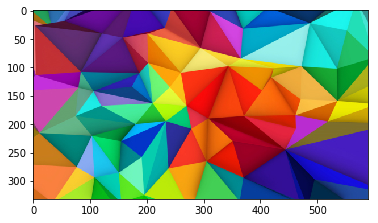

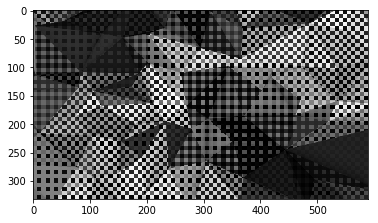

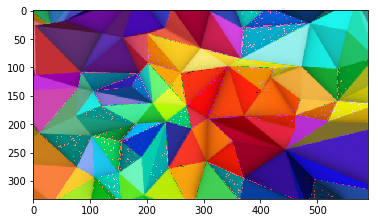

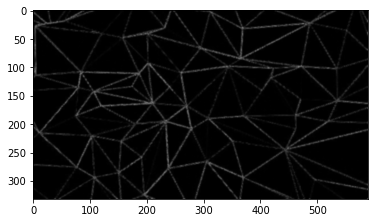

The average per-pixel error for tony is: 21.396390647335103
The maximum per-pixel error for tony is: 684


True

In [121]:
# 4
origi_img4 = read_image('img4.jpg')
mosaic_img4 = get_mosaic_image(origi_img4)
display(origi_img4)
gray = rgb2gray(mosaic_img4)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()
soln_img4 = get_freeman_solution_image(mosaic_img4)
display(soln_img4)


pp_err, max_err, ssd = compute_errors(soln_img4, origi_img4, True)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

image_to_write = cv2.cvtColor(soln_img4, cv2.COLOR_RGB2BGR)
cv2.imwrite('soln_img4.png', image_to_write)

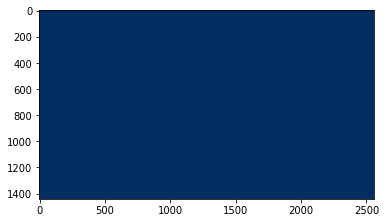

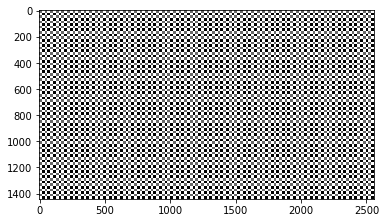

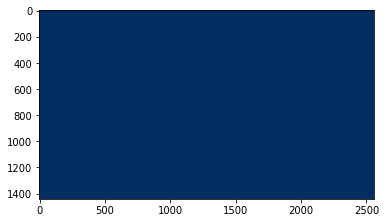

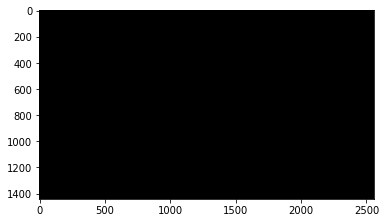

The average per-pixel error for tony is: 0.0002300347222222222
The maximum per-pixel error for tony is: 212


True

In [122]:
# 5
origi_img5 = read_image('img5.jpg')
mosaic_img5 = get_mosaic_image(origi_img5)
display(origi_img5)
gray = rgb2gray(mosaic_img5)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()
soln_img5 = get_freeman_solution_image(mosaic_img5)
display(soln_img5)


pp_err, max_err, ssd = compute_errors(soln_img5, origi_img5, True)
print("The average per-pixel error for tony is: "+str(pp_err))
print("The maximum per-pixel error for tony is: "+str(max_err))

image_to_write = cv2.cvtColor(soln_img5, cv2.COLOR_RGB2BGR)
cv2.imwrite('soln_img5.png', image_to_write)

### Bonus Points

In [123]:
### YOUR CODE HERE ###
### YOU ARE ON YOUR OWN :) ####